# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [2]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
data2015=data[data['Date'].str.contains('2015')].dropna()
#data2015 = data.where(data['Date'].str.contains('2015')).dropna()
data2015['Date'] = data2015.Date.str[5:]
data2015

data['Date'] = data.Date.str[5:]
data = data[data['Date']!='02-09']
record_high = data.groupby('Date')['Data_Value'].max()
record_low = data.groupby('Date')['Data_Value'].min()


In [4]:
high2015  = data2015.groupby('Date')['Data_Value'].max()
low2015 = data2015.groupby('Date')['Data_Value'].min()
type(low2015)
observation_dates = list(range(1,366))

In [5]:
record_high2015 = high2015[high2015 >= record_high.reindex_like(high2015)]
record_low2015 = low2015[low2015 <= record_low.reindex_like(low2015)]

In [6]:
x = [n for n in range(0,365) if (high2015.iloc[n] >= record_high.iloc[n]) ]
print(x)
y = [n for n in range(0,365) if (low2015.iloc[n] <= record_low.iloc[n]) ]
print(y)

[106, 126, 127, 129, 130, 136, 137, 207, 209, 225, 230, 249, 250, 258, 259, 260, 269, 270, 271, 292, 305, 306, 307, 308, 309, 319, 321, 322, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 355, 356, 357, 358, 359]
[4, 10, 33, 43, 46, 47, 50, 51, 54, 55, 57, 58, 63, 64, 65, 86, 87, 88, 113, 114, 134, 139, 152, 183, 239, 240, 289, 290, 291, 292, 312, 313]


In [7]:
plt.figure(figsize=(10,10))
ax1 = plt.gca()

ax1.set_xlabel('Day of the year')
ax1.set_ylabel('Temperature (tenths of degrees C)')
ax1.set_title('Record highest and lowest temperature by day of the year 2015')

plt.plot(observation_dates,record_high,'-o',observation_dates,record_low,'-o',zorder=1)
ax1.legend(['record high temperatures', 'record low temperatures'])

plt.scatter(x,record_high2015,s=100,c='red',zorder=2,alpha=0.7)
plt.scatter(y,record_low2015,s=100,c='red',zorder=2,alpha=0.7)

ax1.legend(['record high temperatures', 'record low temperatures','record broken in 2015'])

ax1.fill_between(observation_dates,record_high, record_low, facecolor='green', alpha=0.25)



plt.show()


ValueError: x and y must be the same size

In [8]:
data = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

In [9]:
data.sort_values('Date').head()

,ID,Date,Element,Data_Value
60995,USW00004848,2005-01-01,TMIN,0
17153,USC00207320,2005-01-01,TMAX,150
17155,USC00207320,2005-01-01,TMIN,-11
10079,USW00014833,2005-01-01,TMIN,-44
10073,USW00014833,2005-01-01,TMAX,33


In [10]:
data['Month-Day'] = data.apply(lambda row:'-'.join(row['Date'].split('-')[1:]),axis=1)

In [11]:
data.head()

,ID,Date,Element,Data_Value,Month-Day
0,USW00094889,2014-11-12,TMAX,22,11-12
1,USC00208972,2009-04-29,TMIN,56,04-29
2,USC00200032,2008-05-26,TMAX,278,05-26
3,USC00205563,2005-11-11,TMAX,139,11-11
4,USC00200230,2014-02-27,TMAX,-106,02-27


In [12]:
data = data[data['Date']!='02-09']

In [13]:
data[data['Month-Day']=='01-01'].min()

ID            USC00200032
Date           2005-01-01
Element              TMAX
Data_Value           -160
Month-Day           01-01
dtype: object

In [14]:
data['Date']=pd.to_datetime(data['Date'])

In [15]:
data.dtypes

ID                    object
Date          datetime64[ns]
Element               object
Data_Value             int64
Month-Day             object
dtype: object

In [16]:
TMAX = data[data['Element']=='TMAX'] 
TMIN = data[data['Element']=='TMIN'] 
TMAX.head()

,ID,Date,Element,Data_Value,Month-Day
0,USW00094889,2014-11-12,TMAX,22,11-12
2,USC00200032,2008-05-26,TMAX,278,05-26
3,USC00205563,2005-11-11,TMAX,139,11-11
4,USC00200230,2014-02-27,TMAX,-106,02-27
5,USW00014833,2010-10-01,TMAX,194,10-01


In [17]:
data_periodo_max=TMAX[TMAX['Date'] < '2015-01-01']
data_periodo_min=TMIN[TMIN['Date'] < '2015-01-01']

In [18]:
data_periodo_max.sort_values('Date')

,ID,Date,Element,Data_Value,Month-Day
49030,USC00207312,2005-01-01,TMAX,150,01-01
55424,USC00207308,2005-01-01,TMAX,150,01-01
18261,USC00205050,2005-01-01,TMAX,56,01-01
18049,USW00014853,2005-01-01,TMAX,56,01-01
60994,USW00004848,2005-01-01,TMAX,133,01-01
1860,USC00202308,2005-01-01,TMAX,150,01-01
17153,USC00207320,2005-01-01,TMAX,150,01-01
39569,USC00200842,2005-01-01,TMAX,144,01-01
32266,USC00208202,2005-01-01,TMAX,150,01-01
41334,USC00208080,2005-01-01,TMAX,33,01-01


In [56]:
data_2015_max=TMAX[TMAX['Date'] >= '2015-01-01']
data_2015_min=TMIN[TMIN['Date'] >= '2015-01-01']

In [57]:
TMAX_GROUP=data_periodo_max.groupby('Month-Day').max()
TMIN_GROUP=data_periodo_min.groupby('Month-Day').min()

In [58]:
TMAX_2015_GROUP=data_2015_max.groupby('Month-Day').max()
TMIN_2015_GROUP=data_2015_min.groupby('Month-Day').min()

In [59]:
TMAX_2015_GROUP=TMAX_2015_GROUP.reset_index()
data_max = TMAX_GROUP.reset_index().merge(TMAX_2015_GROUP, on='Month-Day').set_index('Month-Day')

TMIN_2015_GROUP=TMIN_2015_GROUP.reset_index()
data_min = TMIN_GROUP.reset_index().merge(TMIN_2015_GROUP, on='Month-Day').set_index('Month-Day')

In [60]:
data_min

,ID_x,Date_x,Element_x,Data_Value_x,ID_y,Date_y,Element_y,Data_Value_y
Month-Day,,,,,,,,
01-01,USC00200032,2005-01-01,TMIN,-160,USC00200032,2015-01-01,TMIN,-133
01-02,USC00200032,2005-01-02,TMIN,-267,USC00200032,2015-01-02,TMIN,-122
01-03,USC00200032,2005-01-03,TMIN,-267,USC00200032,2015-01-03,TMIN,-67
01-04,USC00200032,2005-01-04,TMIN,-261,USC00200032,2015-01-04,TMIN,-88
01-05,USC00200032,2005-01-05,TMIN,-150,USC00200032,2015-01-05,TMIN,-155
01-06,USC00200032,2005-01-06,TMIN,-266,USC00200032,2015-01-06,TMIN,-182
01-07,USC00200032,2005-01-07,TMIN,-306,USC00200032,2015-01-07,TMIN,-182
01-08,USC00200032,2005-01-08,TMIN,-294,USC00200032,2015-01-08,TMIN,-211
01-09,USC00200032,2005-01-09,TMIN,-278,USC00200032,2015-01-09,TMIN,-206


In [61]:
data_max
data_max.rename(columns={'Data_Value_y':'Data_Max_2015', 'Data_Value_x': 'Data_value'}, inplace=True)
data_min.rename(columns={'Data_Value_y':'Data_Min_2015', 'Data_Value_x': 'Data_value'}, inplace=True)
data_max

data_min=data_min.reset_index()
data_max=data_max.reset_index()

In [62]:
break_min = data_min[data_min["Data_Min_2015"] < data_min["Data_value"]]
break_max = data_max[data_max["Data_Max_2015"] > data_max["Data_value"]]
break_max


,Month-Day,ID_x,Date_x,Element_x,Data_value,ID_y,Date_y,Element_y,Data_Max_2015
39,02-09,USW00094889,2014-02-09,TMAX,78,USW00094889,2015-02-09,TMAX,83
106,04-17,USW00094889,2014-04-17,TMAX,244,USW00094889,2015-04-17,TMAX,278
126,05-07,USW00094889,2014-05-07,TMAX,256,USW00094889,2015-05-07,TMAX,306
127,05-08,USW00094889,2014-05-08,TMAX,317,USW00094889,2015-05-08,TMAX,333
130,05-11,USW00094889,2014-05-11,TMAX,294,USW00094889,2015-05-11,TMAX,306
137,05-18,USW00094889,2014-05-18,TMAX,289,USW00094889,2015-05-18,TMAX,317
207,07-27,USW00094889,2014-07-27,TMAX,333,USW00094889,2015-07-27,TMAX,339
209,07-29,USW00094889,2014-07-29,TMAX,339,USW00094889,2015-07-29,TMAX,361
230,08-19,USW00094889,2014-08-19,TMAX,322,USW00094889,2015-08-19,TMAX,328
249,09-07,USW00094889,2014-09-07,TMAX,344,USW00094889,2015-09-07,TMAX,350


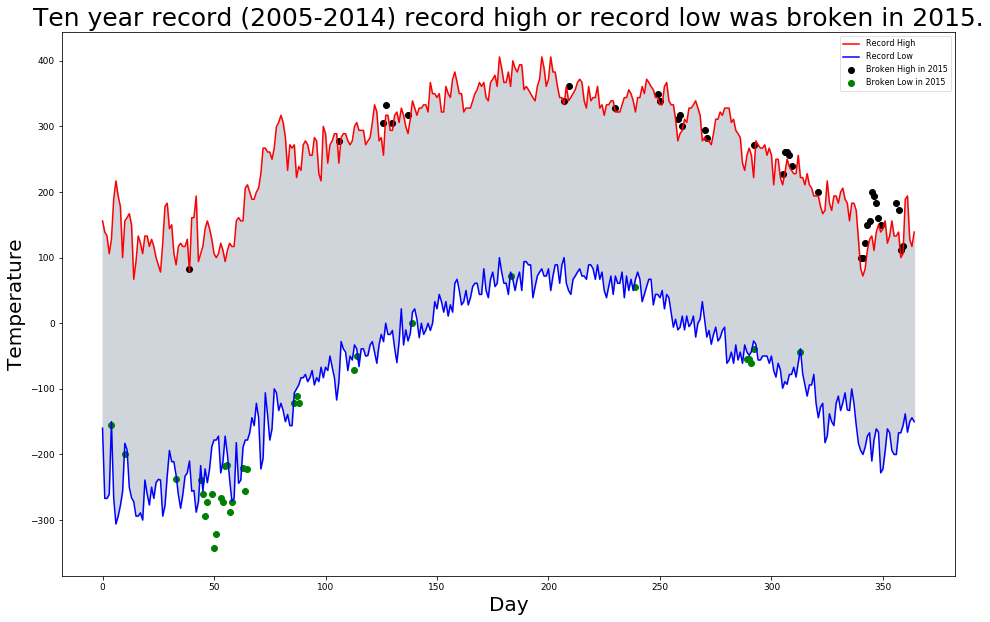

In [65]:
%matplotlib inline

plt.figure(figsize=(16,10))
ax = plt.gca()

plt.plot(data_max["Data_value"].values, c = 'red', label ='Record High')
plt.plot(data_min["Data_value"].values, c = 'blue', label ='Record Low')
plt.fill_between([x for x in range(0, len(data_max))],data_max["Data_value"].values, data_min["Data_value"].values, color='#d0d4db')

plt.xlabel('Day', fontsize=20)
plt.ylabel('Temperature', fontsize=20)
plt.title('Ten year record (2005-2014) record high or record low was broken in 2015.', fontsize=25)

plt.scatter(break_max.index, break_max['Data_Max_2015'].values, c = 'black', label = "Broken High in 2015")
plt.scatter(break_min.index, break_min['Data_Min_2015'].values, c = 'green', label = "Broken Low in 2015")

            
leg = ax.legend(prop={'size':8}, framealpha=0.6)
plt.tick_params(axis='both', which='both', labelsize=9)

In [27]:
    for spline in zip(ax.spines, ax.spines.values()):
        if spline[0] == "top" or spline[0] == "right":
            spline[1].set_visible(False)
        else:
            spline[1].set_alpha(0.2)
    ticks = ax.xaxis.get_major_ticks()    
    for tick in ticks:
        if tick.label1.get_text() != "":
            tick.set_visible(True)
        else:
            tick.set_visible(False)
            
    leg = ax.legend(prop={'size':8}, framealpha=0.6)
    plt.tick_params(axis='both', which='both', labelsize=9)

NameError: name 'ax' is not defined

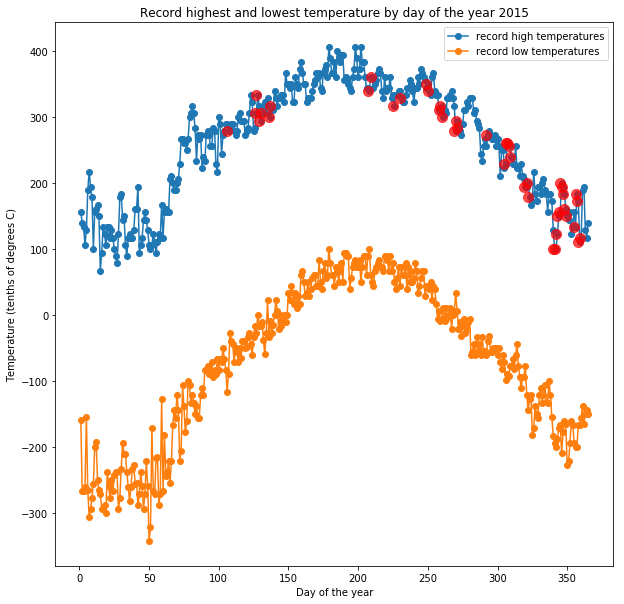

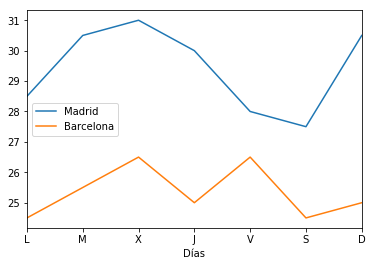

In [19]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.DataFrame({'Días':['L', 'M', 'X', 'J', 'V', 'S', 'D'], 
                   'Madrid':[28.5, 30.5, 31, 30, 28, 27.5, 30.5], 
                   'Barcelona':[24.5, 25.5, 26.5, 25, 26.5, 24.5, 25]})
fig, ax = plt.subplots()
df.plot(x = 'Días', y = 'Madrid', ax = ax)
df.plot(x = 'Días', y = 'Barcelona', ax = ax)
plt.show()